In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_titanic = pd.read_csv('train.csv')
df_titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
df_titanic.tail(6) #all the information that belongs to the last six passengers (Q1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [3]:
df_titanic.columns #column titles (Q2)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df_titanic.shape #the size (891) and dimension of the dataset (12) (Q3)

(891, 12)

In [5]:
df_titanic.isnull().sum() #how many missing values there are in the dataset for each feature column (NaN)(Q4)
# Age (177), Cabin (867) and Embarked (2) have null columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_titanic_drop_age = df_titanic["Age"].dropna() #Deleted null values on age column
df_titanic_drop_age.shape 

(714,)

In [7]:
df_titanic_drop_cabin = df_titanic["Cabin"].dropna() #Deleted null values on cabin column
df_titanic_drop_cabin.shape

(204,)

In [8]:
df_titanic_drop_embarked = df_titanic["Embarked"].dropna() #Deleted null values on embarked column
df_titanic_drop_embarked.shape

(889,)

In [9]:
all_pclass = df_titanic[["Pclass","Survived"]].groupby("Pclass").count() #all the passengers that were traveling in the 1st, 2nd and 3rd classes
pclass_percentage=all_pclass*100/891
all_pclass,pclass_percentage

(        Survived
 Pclass          
 1            216
 2            184
 3            491,
          Survived
 Pclass           
 1       24.242424
 2       20.650954
 3       55.106622)

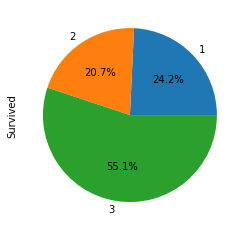

In [10]:
all_pclass["Survived"].plot.pie(autopct='%1.1f%%'); #the percentage of the passengers that were traveling in the 1st, 2nd and 3rd classes
#autopct for percentage values
#most passengers were traveling in the 3st class with 55.1%    (Q5)

In [11]:
survived_or_not=df_titanic["Survived"].value_counts() 
survived_or_not #number of passengers who survived and the number of passengers who did not survive 

0    549
1    342
Name: Survived, dtype: int64

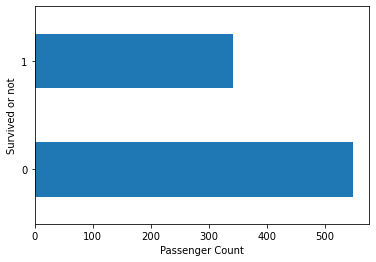

In [12]:
plt= (df_titanic["Survived"] #selected survived column and reached value counts for x-label  (Q6)
 .value_counts()
 .plot
 .barh());
plt.set_xlabel('Passenger Count');
plt.set_ylabel('Survived or not');

In [13]:
sorting_survived = df_titanic.sort_values(by=['Pclass']) #sorted by pclass values
pclass_and_survived = sorting_survived[["Survived", "Pclass"]] #selected survived and pclass columns
pclass_and_survived

,Survived,Pclass
445,1,1
310,1,1
309,1,1
307,1,1
306,1,1
...,...,...
379,0,3
381,1,3
382,0,3
371,0,3


In [14]:
pd.crosstab(df_titanic["Pclass"], df_titanic["Survived"],margins=True) #values checked

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [15]:
first_class = pclass_and_survived[0:216] #We know that the first class has 216 passengers. So, we select that part.
second_class = pclass_and_survived[216:400] #We know that the second class has 184 passengers. So, we select that part.
third_class = pclass_and_survived[400:891] #We know that the third  class has 491 passengers. So, we select that part.
first_class,second_class,third_class

(     Survived  Pclass
 445         1       1
 310         1       1
 309         1       1
 307         1       1
 306         1       1
 ..        ...     ...
 102         0       1
 54          0       1
 110         0       1
 6           0       1
 61          1       1
 
 [216 rows x 2 columns],
      Survived  Pclass
 84          1       2
 706         1       2
 357         0       2
 53          1       2
 695         0       2
 ..        ...     ...
 178         0       2
 272         1       2
 562         0       2
 596         1       2
 123         1       2
 
 [184 rows x 2 columns],
      Survived  Pclass
 636         0       3
 574         0       3
 860         0       3
 859         0       3
 575         0       3
 ..        ...     ...
 379         0       3
 381         1       3
 382         0       3
 371         0       3
 890         0       3
 
 [491 rows x 2 columns])

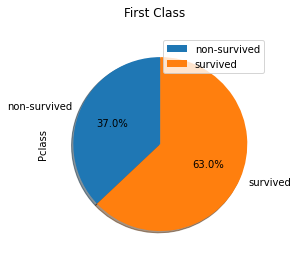

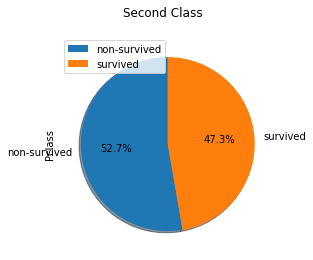

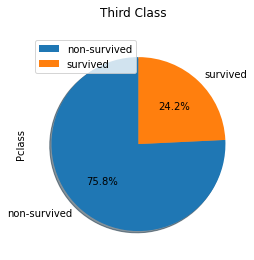

In [16]:
labels=["non-survived","survived"] #(Q7) Charts have been created
(first_class.groupby("Survived").count().plot.pie(subplots=True, autopct='%1.1f%%',title="First Class", labels= labels,shadow=True,startangle=90), 
second_class.groupby("Survived").count().plot.pie(subplots=True, autopct='%1.1f%%',title="Second Class",labels= labels,shadow=True,startangle=90),
third_class.groupby("Survived").count().plot.pie(subplots=True, autopct='%1.1f%%',title="Third Class",labels= labels,shadow=True,startangle=90));

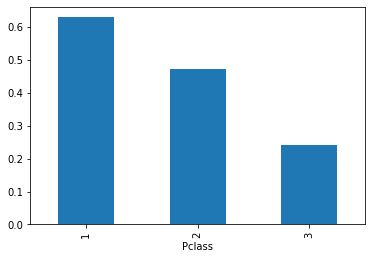

In [17]:
sum_pclass = df_titanic.groupby("Pclass")["Survived"].mean()
sum_pclass.plot(kind="bar");
#rate of most survived passengers were travelling in 1st class (Q8)
#Since the rooms of third-class passengers are located at the lower part of the ship, there is a high probability that 
#water will enter their rooms first.


In [18]:
pd.crosstab(df_titanic["Sex"], df_titanic["Survived"],margins=True) # (Q9) Crosstab has been created with sex and survived column

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [19]:
sum_emb = df_titanic.groupby("Embarked")["Survived"].count() # All embarked class
survived_emb = df_titanic.groupby("Embarked")["Survived"].sum() #Survived embarked
not_survived_emb = sum_emb-survived_emb #Non-survived embarked
type(survived_emb), type(not_survived_emb)

(pandas.core.series.Series, pandas.core.series.Series)

In [20]:
pd.crosstab(df_titanic["Embarked"], df_titanic["Survived"],margins=True) #controlled values which calculated before
#we can say that we found the correct values

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


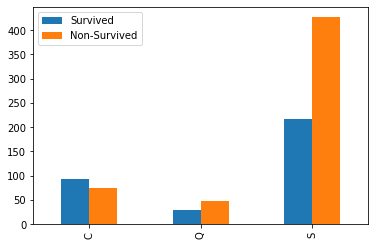

In [21]:
all_pclass = pd.DataFrame({  #Q(10)
    "Survived": [survived_emb[0],survived_emb[1],survived_emb[2]], #all C,Q,S values which survived for y-label
    "Non-Survived": [not_survived_emb[0],not_survived_emb[1],not_survived_emb[2]] #all C,Q,S values which didn't survive for y-label
}, index=["C", "Q", "S"]) #x-label values
all_pclass.plot(kind="bar"); 

In [22]:
bins= [0,19,60,81] #Q(11)
labels = ["child","adult","old"]
df_titanic['Age_Group'] = pd.cut(df_titanic['Age'], bins=bins, labels=labels,  right=False) 
# created a new column named Age_Group including child -> (0,18), adult -> (19,60), old -> (60,) values
pd.crosstab([df_titanic["Sex"], df_titanic["Survived"]], df_titanic["Age_Group"], rownames=["Sex","Survived"], colnames=["Age Group"], margins=True)
#created cross table including sex, survived and age group values

Age Group        child  adult  old  All
Sex    Survived                        
female 0            22     42    0   64
       1            46    147    4  197
male   0            47    294   19  360
       1            24     66    3   93
All                139    549   26  714

In [23]:
df_titanic #we can see that created Age_Group column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,adult


In [24]:
df_titanic['Title'] = df_titanic.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
#created title column in df_class using regex
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,adult,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,adult,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,adult,Mr


In [25]:
df_titanic["Title"].value_counts()  #most commonly used title is "Mr" used 517 times  #Q(13) 
# There are 17 different title in the title column Q(14)

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [26]:
df_titanic["Age"].mean() #the average age of the passengers # Q(15)

29.69911764705882

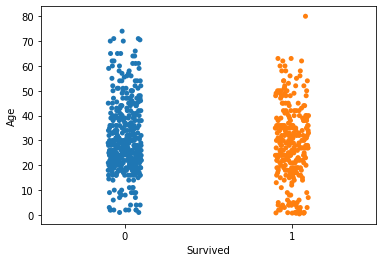

In [27]:
df_titanic_drop_age
sns.stripplot(x=df_titanic["Survived"], y=df_titanic_drop_age, data= df_titanic);  # Q(16)

In [28]:
age_and_survived = df_titanic[["Survived", "Age"]] # Q(17)
age_and_survived.max() # survived 1 non-survived is 0 so, we can use max function to find max values of age and survived columns

Survived     1.0
Age         80.0
dtype: float64

In [29]:
grp = df_titanic.groupby(['Age_Group','Survived'])
nschild= grp.get_group(("child",0)) #selected non-survived child group
schild= grp.get_group(("child",1)) #selected survived child group
c = [nschild.shape[0],schild.shape[0]] # 0. index gives us survived and non-survived numbers
type(c)

list

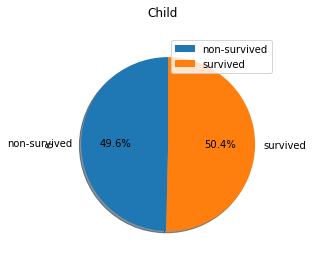

In [30]:
labels=["non-survived","survived"] #Charts have been created
c = pd.DataFrame(c) # changed list type to data frame for creating pie chart
c.plot(kind="pie", subplots="True", autopct='%1.1f%%',title="Child",labels= labels,shadow=True,startangle=90);

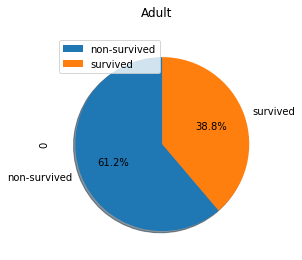

In [31]:
nsadult= grp.get_group(("adult",0))
sadult= grp.get_group(("adult",1))
a = [nsadult.shape[0],sadult.shape[0]]
a = pd.DataFrame(a) # changed list type to data frame to ceating pie chart
a.plot(kind="pie", subplots="True", autopct='%1.1f%%',title="Adult",labels= labels,shadow=True,startangle=90);

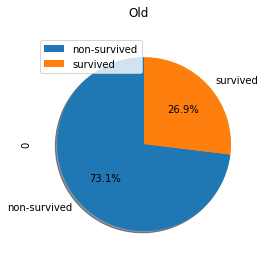

In [32]:
nsold= grp.get_group(("old",0))
sold= grp.get_group(("old",1))
o = [nsold.shape[0],sold.shape[0]]
o = pd.DataFrame(o) # changed list type to data frame to ceating pie chart
o.plot(kind="pie", subplots="True", autopct='%1.1f%%',title="Old",labels= labels,shadow=True,startangle=90);

In [33]:
df_titanic["SibSp"].max() #the highest number of siblings Q(20)

8